# CNN model

### Loading Libraries

In [1]:
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd gdrive/MyDrive/Audio/

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import random

import os
from PIL import Image
import csv

#Keras
import keras
import warnings
warnings.filterwarnings('ignore')
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras import models
from keras.models import Sequential
from keras import optimizers 
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras import regularizers

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import  classification_report, ConfusionMatrixDisplay


#### Function to visualize

In [27]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

#

### Loading train/val/test sets

* I will upload dataset shortly. Meanwhile in order to evaluate the performance, you can use models in models directory

In [28]:
# image_dir='../../image_data/set-8-1-1'

# train_dir = image_dir+"/train/"
# train_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(train_dir,target_size=(100,100),
#                                                     color_mode="rgba",class_mode='categorical',batch_size=18580)

# val_dir = image_dir+"/val/"
# val_datagen = ImageDataGenerator(rescale=1./255)
# val_generator = val_datagen.flow_from_directory(val_dir,target_size=(100,100),
#                                                 color_mode='rgba',class_mode='categorical',batch_size= 2319)

# test_dir = image_dir+"/test/"
# test_datagen = ImageDataGenerator(rescale=1./255)
# test_generator = test_datagen.flow_from_directory(test_dir, target_size=(100,100),
#                                                   color_mode='rgba',class_mode='categorical',batch_size= 2326)

In [29]:
# train_images, train_labels = next(train_generator)
# test_images, test_labels = next(test_generator)
# val_images, val_labels = next(val_generator)

In [30]:
import pickle
file_name = "../../data_images/set_2x2-8-1-1_5sec.pkl"
with open(file_name, "rb") as f:
      saved_images=pickle.load(f)


### Reshaping Data

In [31]:
train_images, train_labels = saved_images[0]
test_images, test_labels = saved_images[1]
val_images, val_labels = saved_images[2]

print(train_labels.shape)
print(train_images.shape)

(22291, 14)
(22291, 100, 100, 4)


In [32]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(22291, 40000)
(2797, 40000)
(2782, 40000)


### Reshaping y data

In [11]:
train_y=np.array([np.argmax(i) for i in train_labels]).reshape(train_images.shape[0], -1)
test_y=np.array([np.argmax(i) for i in test_labels]).reshape(test_images.shape[0], -1)
val_y=np.array([np.argmax(i) for i in val_labels]).reshape(val_images.shape[0], -1)


print(train_y.shape)
print(test_y.shape)
print(val_y.shape)



(22291, 1)
(2797, 1)
(2782, 1)


## Checking the shapes of train, val and test data

In [12]:
print ("Number of training samples: " + str(train_img.shape[0]))
print ("Number of testing samples: " + str(test_img.shape[0]))
print ("Number of validation samples: " + str(val_img.shape[0]))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 22291
Number of testing samples: 2797
Number of validation samples: 2782
train_images shape: (22291, 100, 100, 4)
train_labels shape: (22291, 14)
test_images shape: (2797, 100, 100, 4)
test_labels shape: (2797, 14)
val_images shape: (2782, 100, 100, 4)
val_labels shape: (2782, 14)


In [13]:
train_images.shape[1:]

(100, 100, 4)

## Building a Network

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(256, (3, 3), activation='relu',
                        input_shape=(train_images.shape[1:])))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Dropout(0.35))


model.add(layers.Conv2D(40, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(40, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(14, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
#              optimizer=Adam(lr=0.0005),
              optimizer='adam',
              metrics=['accuracy'])

#optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),


## Training

#### (commented, as it takes hours to train)

In [15]:
# checkpoint = [# EarlyStopping(monitor='val_accuracy', patience=20, mode='auto'), 
#                   ModelCheckpoint(filepath='best_model_cnn_6sec_.h5', monitor='val_accuracy', save_best_only=True)]

# np.random.seed(5)

# ### takes 5-6 hours with GPU 

# history = model.fit(train_images,
#                      train_y,
#                      epochs=400,
#                      batch_size=8, callbacks=checkpoint,
#                      validation_data=(val_images, val_y) )

In [17]:
# score_test = model.evaluate(test_images, test_y, verbose=0)
# print("Testing Accuracy: ", score_test[1])
# print("Testing Cross Entropy: %.2f" % score_test[0])

# score_val = model.evaluate(val_images, val_y, verbose=0)
# print("Val Accuracy: ", score_val[1])
# print("Val Cross Entropy: %.2f" % score_val[0])

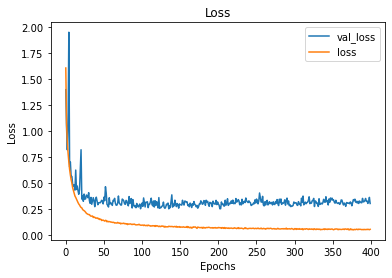

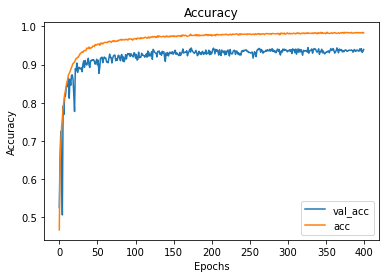

In [ ]:
#  visualize_training_results(history)

In [21]:
#model.save('../../models/CNN_best_model_5sec(94).h5')

### Evaluation of saved model

In [22]:
best_model = keras.models.load_model('../../models/CNN_best_model_5sec(94).h5')

In [23]:
score_test = best_model.evaluate(test_images, test_y, verbose=0)
print("Testing Accuracy: ", score_test[1])
print("Testing Cross Entropy: %.2f" % score_test[0])

score_val = best_model.evaluate(val_images, val_y, verbose=0)
print("Val Accuracy: ", score_val[1])
print("Val Cross Entropy: %.2f" % score_val[0])

Testing Accuracy:  0.9420807957649231
Testing Cross Entropy: 0.32
Val Accuracy:  0.9446441531181335
Val Cross Entropy: 0.27


In [24]:
y_pred=best_model.predict(test_images)
y_pred=np.argmax(y_pred, axis=1).reshape(-1,1)

In [25]:

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       188
           1       0.93      0.98      0.96       257
           2       0.99      0.95      0.97       221
           3       0.98      1.00      0.99       210
           4       0.95      0.95      0.95       123
           5       0.95      0.99      0.97       219
           6       0.94      0.91      0.93       237
           7       0.91      0.98      0.94       162
           8       0.91      0.92      0.92       186
           9       0.88      0.94      0.91       138
          10       0.95      0.90      0.92       222
          11       0.93      0.88      0.90       171
          12       0.92      0.94      0.93       236
          13       0.96      0.95      0.95       227

    accuracy                           0.94      2797
   macro avg       0.94      0.94      0.94      2797
weighted avg       0.94      0.94      0.94      2797



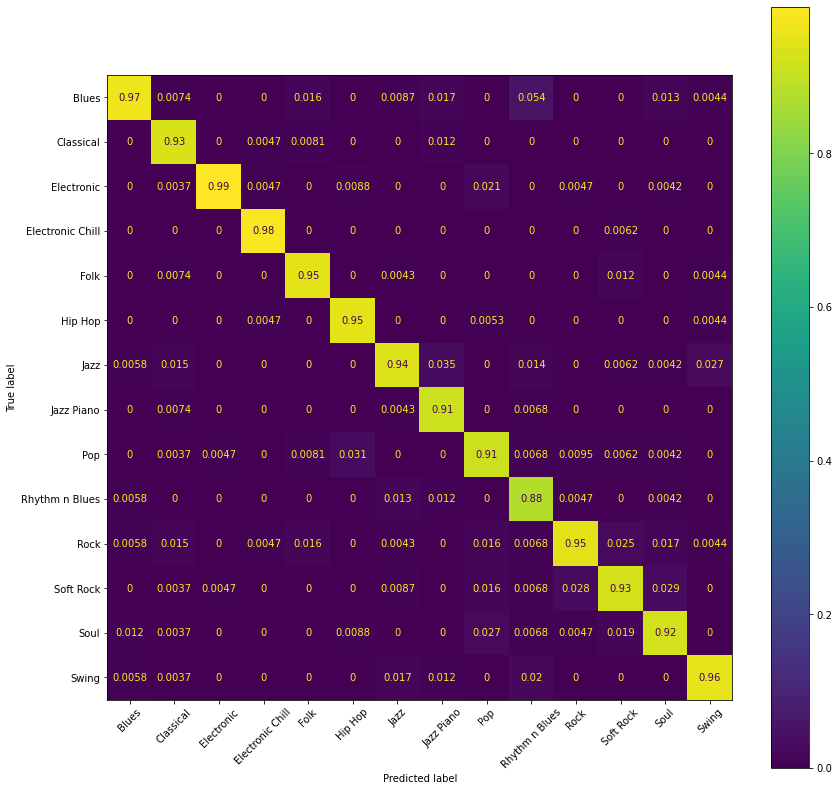

In [33]:
# Loading a LabelEncoder transformer to get labels for classes

import joblib    
with open('../../models/NN_transformers_6sec_14genres_new.joblib', 'rb') as f:
      encoder,scaler = joblib.load(f)

fig, ax = plt.subplots(figsize=(14,14))
ConfusionMatrixDisplay.from_predictions(test_y, y_pred, ax=ax, normalize='pred', display_labels=encoder.classes_);
plt.xticks(rotation=45);